# Machine Learning - TD report

By **CHARRIER Timothée** and **RAVELET Thomas**

We created a python file to import many functions from it. It is called `Lib.py` and is located in the same folder as this notebook. It increases the readability of the notebook, mostly for long functions.

---

## 1. First steps

In [1]:
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Importing Lib 
import TD_src.Lib as Lib
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Loading the raw dataset
(X_train, Y_train), (X_test, Y_test) = Lib.Loading_MNIST().get_all_data_raw()

### 1.1. What are the shape of the data? 

In [3]:
# Display the dataset shape

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


The dataset MNIST is composed of 70 000 images of handwritten digits. Each image is 28x28 pixels. The dataset is split into 60 000 training images and 10 000 test images. The raw training set is stored in a (60000, 28, 28) array and the raw test set is stored in a (10000, 28, 28) array. The labels are stored in a (60000,) array for the training set and a (10000,) array for the test set (each label is an integer between 0 and 9). We will see later that reshaping the data is necessary to use it in a neural network.

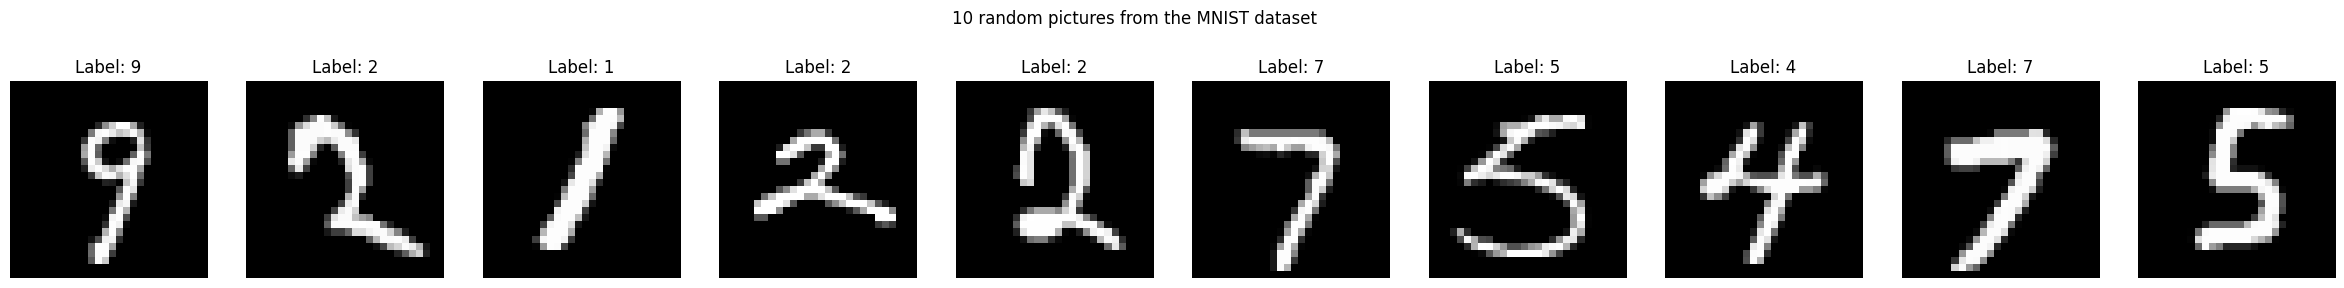

In [9]:
# Display 10 random pictures with their labels and axis off

fig, ax = plt.subplots(1, 10)
for i in range(10):
    random_index = random.randint(0, len(X_train))
    ax[i].imshow(X_train[random_index], cmap='gray')
    ax[i].set_title("Label: {}".format(Y_train[random_index]))
    ax[i].axis('off')
        
plt.suptitle("10 random pictures from the MNIST dataset")
fig.set_size_inches(30, 3.5)
plt.show()

### 1.2. Why split the data into training and test sets is important?

The method train_test_split allows to separate the data into two parts: a training part and a test part. This allows to test the model on data that it has not seen during training. This allows to check that the model is not over-trained. Indeed, if the model is over-trained, it will be able to predict the training data but not the test data. This means that the model is not generalizable.

### 1.3. Are the training and test sets balanced?

To check if the training and test sets are balanced, we can plot the number of images for each digit in percentage. We can see that the training and test sets are balanced.

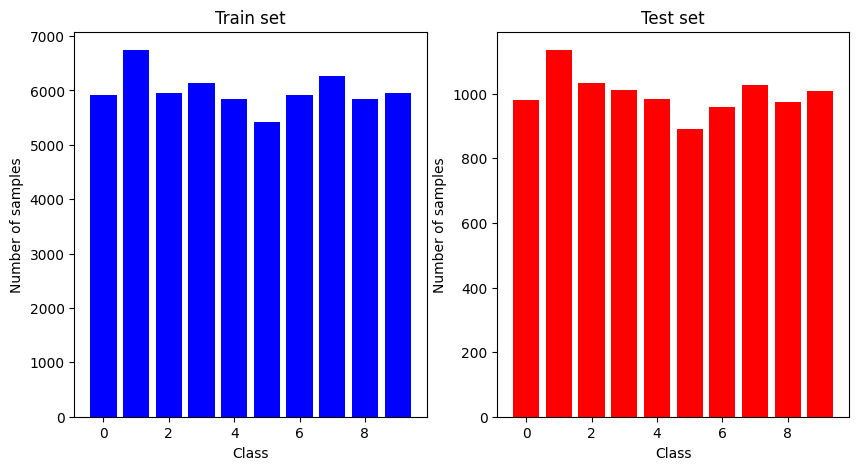

Train set standard deviation: 78.57
Test set standard deviation: 79.17


In [10]:
# Data balancing 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(np.arange(10), np.bincount(Y_train), color='blue')
ax[0].set_title("Train set")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of samples")
ax[1].bar(np.arange(10), np.bincount(Y_test), color='red')
ax[1].set_title("Test set")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Number of samples")
plt.show()

# Ecarts types

print("Train set standard deviation: {:.2f}".format(np.std(X_train)))
print("Test set standard deviation: {:.2f}".format(np.std(X_test)))

We can see that the training and test sets are balanced.

## 2. Second part: non-supervised learning

### 2.1. Perform a PCA on the training set

In this question, we will perform a PCA on the training set with the value of n_components in the following list: [10, 50, 100, 200, 500, 784]. We will then plot a random image of the training set and the corresponding image after the PCA.

In [5]:
# Reshape the dataset to 1D so that it has the same number of rows as before, but only one column.
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

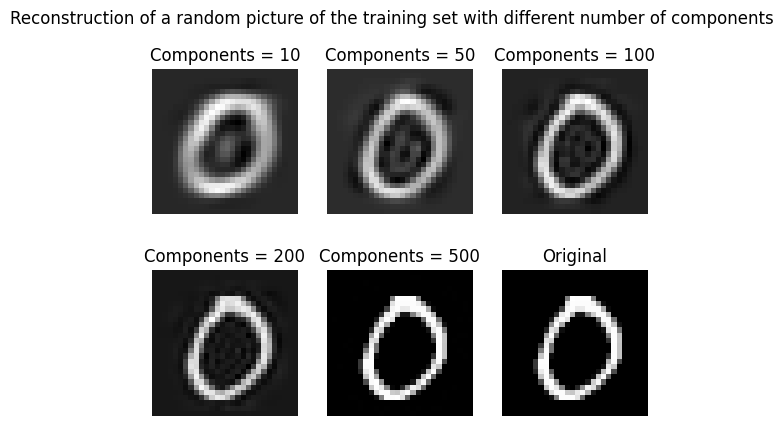

In [24]:
# Displays the reconstruction of a random image from the MNIST dataset with different number of components

n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 784]

List_explained_variance = Lib.PCA_reconstruction_example(X_train_flat, n_components)

### 2.2. Explain these values according to your understanding of PCA and use these values to fit a relevant value for n_components.

We can see that the more components we keep, the more the image is similar to the original image. However, we can see that the image is not very clear when we keep only 10 components. We can also see that the image is very clear when we keep 784 components. Thus, we can say that the best value for n_components is 784. But the higher the value of n_components, the longer the computation time. Thus, we can choose a value of n_components between 200 and 500 to have a good image and a short computation time.

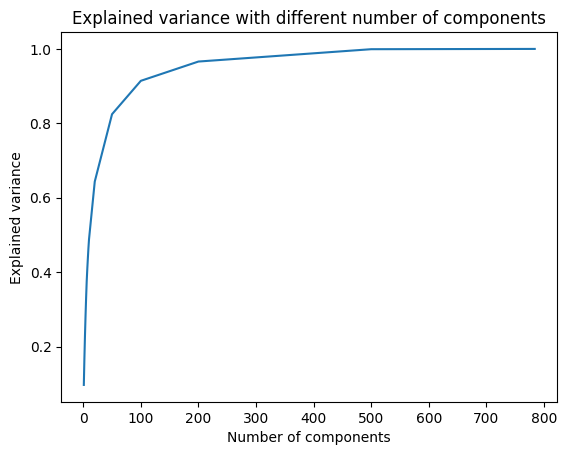

In [ ]:
# Plot the explained variance

plt.plot(n_components, List_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance with different number of components")
plt.show()

When plotting the cumulative explained variance ratio, we can see that the first 200 components explain 90% of the variance. Thus, we can choose a value of n_components between 200 and 500 to have a good image and a short computation time.

**Data Clustering**
### 2.1. With sklearn, perform K-MEANS. Play with the parameter K as well as the initialization (KMEANS++, random, or fixed array).

Let's play with the parameter K to see the impact on the homogeneity score. Before, we reduce the dimension of the data with PCA to 200 components according to the previous question. Computation time will be long if we don't reduce the dimension of the data.

Number of clusters:  1
Number of clusters:  2
Number of clusters:  3
Number of clusters:  4
Number of clusters:  5
Number of clusters:  6
Number of clusters:  7
Number of clusters:  8
Number of clusters:  9
Number of clusters:  10
Number of clusters:  20
Number of clusters:  50
Number of clusters:  100
Number of clusters:  150


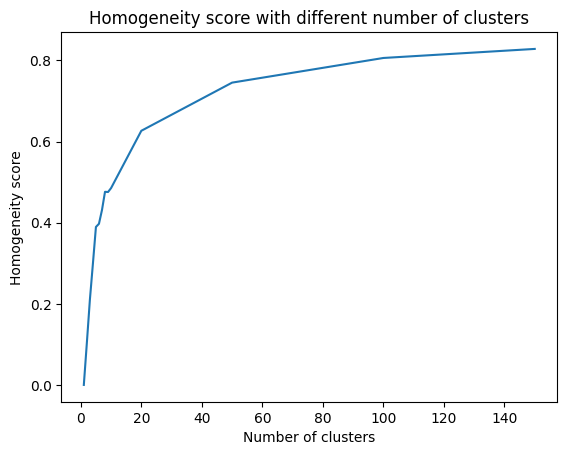

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.decomposition import PCA

K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 150]
Homogeneity_score = []

# PCA with 200 components
pca = PCA(n_components=200)
pca.fit(X_train_flat)
X_train_flat = pca.transform(X_train_flat)

# Plot the homogeneity score with different number of clusters

for k in K:
    print("Number of clusters: ", k)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_flat)
    Homogeneity_score.append(homogeneity_score(Y_train, kmeans.labels_))

plt.plot(K, Homogeneity_score)
plt.xlabel("Number of clusters")
plt.ylabel("Homogeneity score")
plt.title("Homogeneity score with different number of clusters")
plt.show()

The homogeneity increases when K increases. This is normal because the homogeneity is the ratio of the number of correct clusters to the total number of clusters. Thus, the more clusters we have, the more the homogeneity will increase. With more number of smaller clusters, the similarity of cluster members to their respective label becomes higher, resulting in a higher homogeneity score.

Now, let's play with the initialization. We will use the KMeans++ initialization and the random initialization. We will use k=10 and PCA with 200 components.

Initialization method:  k-means++


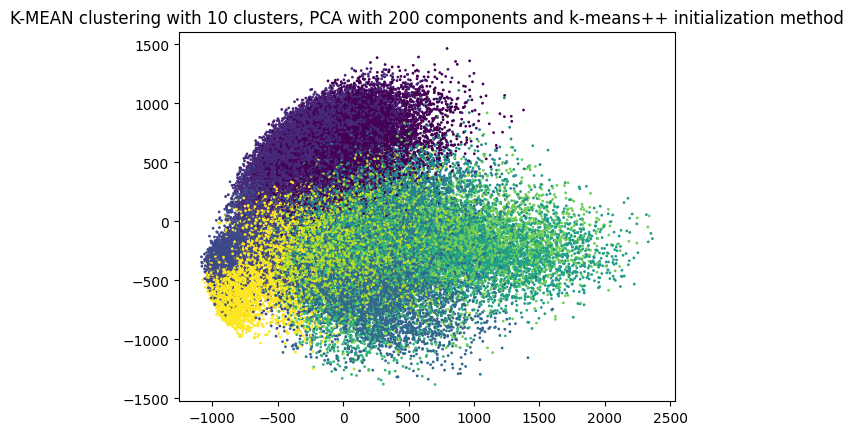

Initialization method:  random


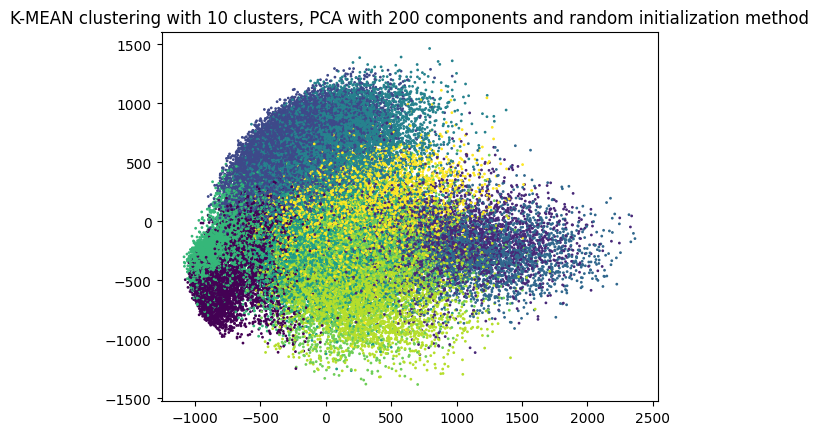

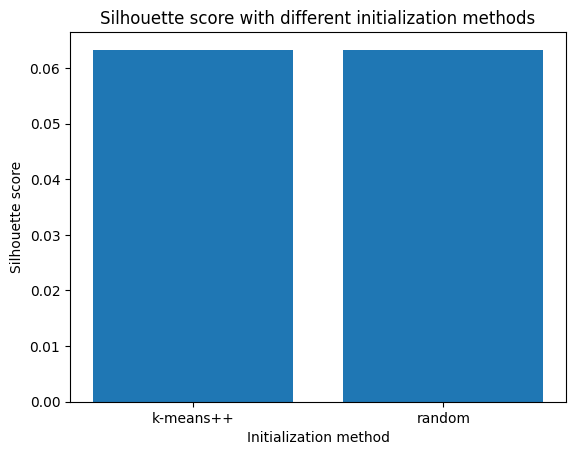

In [10]:
# K-MEAN clustering with 10 clusters, PCA with 200 components and different initialization methods.
from sklearn.metrics import silhouette_score

Init = ['k-means++', 'random']
Silhouette_score = []

for init in Init:
    print("Initialization method: ", init)
    kmeans = KMeans(n_clusters=10, init=init, random_state=0).fit(X_train_flat)
    Silhouette_score.append(silhouette_score(X_train_flat, kmeans.labels_))

    # Scatter plot of the 10 clusters on the same figure
    plt.scatter(X_train_flat[:, 0], X_train_flat[:, 1], c=kmeans.labels_, s=1)
    plt.title("K-MEAN clustering with 10 clusters, PCA with 200 components and {} initialization method".format(init))
    plt.show()

# Compare the silhouette score with different initialization methods
plt.bar(Init, Silhouette_score)
plt.xlabel("Initialization method")
plt.ylabel("Silhouette score")
plt.title("Silhouette score with different initialization methods")
plt.show()

There is no difference between the KMeans++ initialization and the random initialization. The homogeneity score is the same. 

---

### 2.3. For the correct K (K=10), evaluate how good is this partition (with the knowledge of y).

In [11]:
# K-MEAN clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train_flat)

# Evaluate how good the partition is with the knowledge of the true labels
print("Homogeneity score: ", homogeneity_score(Y_train, kmeans.labels_))

Homogeneity score:  0.48525784134729005


The partition is not very good. The homogeneity score is 0.485. This means that 48.5% of the clusters are correct. We also ran for the Rand score and the Adjusted Rand score. Here are the results with the KMeans++ initialization and the random initialization:

| Type of score       | Initialization | Score (in %)|
|---------------------|----------------|-------------|
| Homogeneity         | KMEANS++       | 48.52       |
| Rand score          | KMEANS++       | 36.07       |
| Adjusted Rand score | KMEANS++       | 36.07       |
|---------------------|----------------|-------------|
| Homogeneity         | Random         | 48.5        |
| Rand score          | Random         | 36.08       |
| Adjusted Rand score | Random         | 48.5        |

The result confirms that the partition is not good. Furthermore, we used two functions to report the accuracy of the partition. The first function is the `rand_score` function. The second function is the adjusted_rand_score function. The rand_score function is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization. The `adjusted_rand_score` function is a function that measures the similarity of the two assignments, ignoring permutations and without chance normalization. We can see that the rand_score function is 0.88 and the adjusted_rand_score function is 0.36 There is a big difference between the two functions. This is because the adjusted_rand_score function is more sensitive to the similarity of the two assignments. To sum up, the partition is not good.

### 2.4. Using the PCA performed in section 2 apply K-MEANS with K=10 and n_components = 2. Display the partition and comment.

Let's perform KMEANS with k=10 and PCA with 2 components. We are expecting to get a bad partition due to the PCA of 2 components.

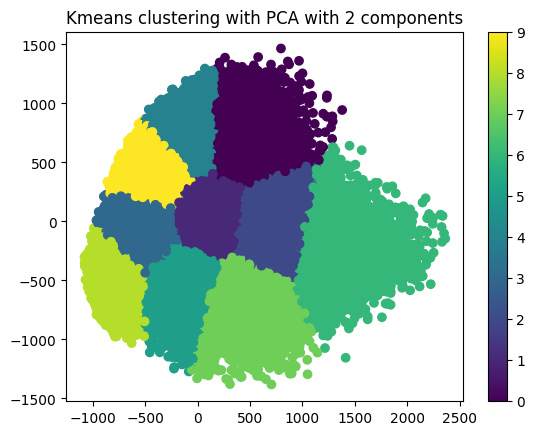

In [10]:
# Perform Kmeans clustering with PCA to reduce dimensionality to 2D.

# PCA
pca = Lib.PCA(n_components=2)
pca.fit(X_train_flat)
X_train_pca = pca.transform(X_train_flat)

# Kmeans clustering
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train_pca)

# Plot the results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
plt.title("Kmeans clustering with PCA with 2 components")
plt.colorbar()
plt.show()

There are several ways to evaluate the clustering results. According to Wikipédia, we can do an internal evaluation or an external evaluation. We will use silouhette score to do an internal evaluation. We will also use the confusion matrix to do an external evaluation.

The silouhette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [12]:
labels = kmeans.labels_
silhouette_score = silhouette_score(X_train_pca, labels, metric='euclidean')
print("Silhouette score: {:.2f}".format(silhouette_score))

Silhouette score: 0.35


The silhouettes score is 0.35. This is not a good score. It means that the clusters are not dense and well separated.

The confusion matrix is the following :

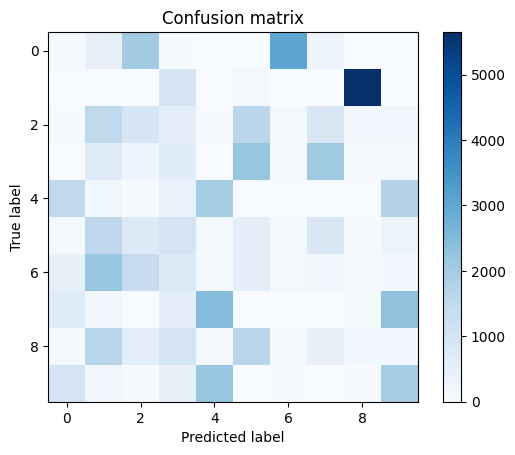

In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_train, labels)
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

A diagonal matrix means that the clusters are well separated. We have the opposite result. This means that the clusters are not well separated.

---

### 2.5. Do the same job with the EM-clustering.

In [ ]:
# Let's do the same but using EM clustering (be careful, it can take a while)

from sklearn.mixture import GaussianMixture
from mlxtend.plotting import plot_learning_curves

# Normalising the data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

# Perform EM clustering with 10 clusters

gmm_spherical = GaussianMixture(n_components=10, covariance_type='spherical', max_iter=100, random_state=0).fit(X_train_flat)
gmm_tied = GaussianMixture(n_components=10, covariance_type='tied', max_iter=100, random_state=0).fit(X_train_flat)
gmm_diag = GaussianMixture(n_components=10, covariance_type='diag', max_iter=100, random_state=0).fit(X_train_flat)

<Figure size 1000x500 with 0 Axes>

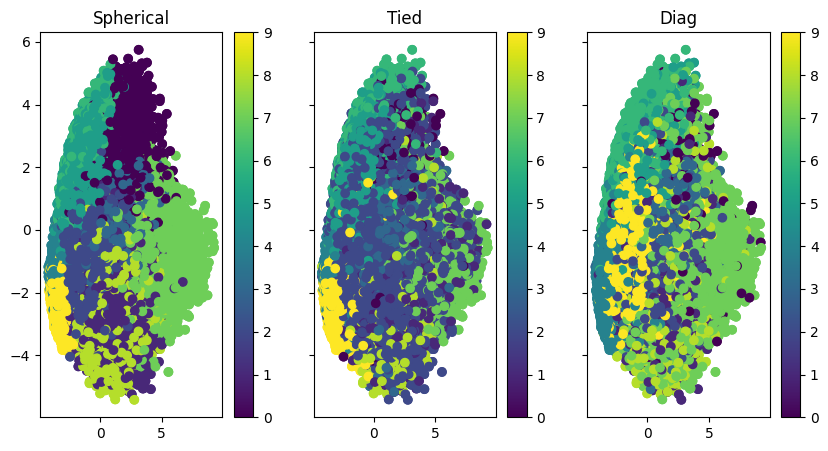

In [ ]:
# Plot the clusters

pca = PCA(n_components=2).fit(X_train_flat)

plt.figure(figsize=(10, 5))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
ax1.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=gmm_spherical.predict(X_train_flat))
ax1.set_title("Spherical")
ax2.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=gmm_tied.predict(X_train_flat))
ax2.set_title("Tied")
ax3.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=gmm_diag.predict(X_train_flat))
ax3.set_title("Diag")
f.colorbar(ax1.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=gmm_spherical.predict(X_train_flat)))
f.colorbar(ax2.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=gmm_tied.predict(X_train_flat)))
f.colorbar(ax3.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=gmm_diag.predict(X_train_flat)))

From the plot above, we are ablse to see some of the clusters, but most of are not very distinct. Let's check the accuracy of the training set and testing set:

In [ ]:
# Evaluate how good the partition is by comparing train and test labels

print("Adjusted Rand score with spherical covariance: {:.2f}%".format(adjusted_rand_score(Y_train, gmm_spherical.predict(X_train_flat))*100))
print("Adjusted Rand score with tied covariance: {:.2f}%".format(adjusted_rand_score(Y_train, gmm_tied.predict(X_train_flat))*100))
print("Adjusted Rand score with diag covariance: {:.2f}%".format(adjusted_rand_score(Y_train, gmm_diag.predict(X_train_flat))*100))

print("Homogeneity score with spherical covariance: {:.2f}%".format(homogeneity_score(Y_train, gmm_spherical.predict(X_train_flat))*100))
print("Homogeneity score with tied covariance: {:.2f}%".format(homogeneity_score(Y_train, gmm_tied.predict(X_train_flat))*100))
print("Homogeneity score with diag covariance: {:.2f}%".format(homogeneity_score(Y_train, gmm_diag.predict(X_train_flat))*100))

Adjusted Rand score with spherical covariance: 36.71%
Adjusted Rand score with tied covariance: 10.87%
Adjusted Rand score with diag covariance: 21.11%
Homogeneity score with spherical covariance: 50.81%
Homogeneity score with tied covariance: 28.49%
Homogeneity score with diag covariance: 29.63%


| Covariance type | Adjusted Rand score (in %) | Homogeneity score (in %) | 
| :--- | :--- | :--- |
| Tied | 10.87 | 28.49 |
| Spherical | 36.71 | 50.81 |
| Diagonal | 21.11 | 29.63 |

Using the EM-clustering, we can see that the partition is not good. Indeed, it is even worse than the K-MEANS partition. We got half of K-MEANS accuracy.
This is because the EM-clustering is not adapted to this problem. The EM-clustering is adapted to continuous data. In this case, the data is discrete. Thus, the EM-clustering is not adapted to this problem. Let's try a last clustering method: the Birch method.

## 3. Third part: supervised learning

### 3.1. What is the major difference between Naïve Bayes Classifier and Support Vector 1 point Machine (or Logistic Regression)?

The major difference between Naïve Bayes Classifier and Support Vector Machine (or Logistic Regression) is that the Naïve Bayes Classifier is a generative model and the Support Vector Machine (or Logistic Regression) is a discriminative model. The generative model tries to model the joint distribution of the data. The discriminative model tries to model the conditional distribution of the data.

### 3.2 - 3.3. With sklearn, perform a classification using your favorite methods. With the documentation, check how to modify the parameters and comment how it influences the results. With the score method, compute the accuracy of the model on the training the test datasets. Why do we need to analyze the performance of the model at training and testing time?

We need to analyze the performance of the model at training and testing time because we need to know if the model is overfitting or underfitting. If the model is overfitting, it means that the model is too complex. Thus, it will not generalize well. If the model is underfitting, it means that the model is too simple. Thus, it will not generalize well.

**Support Vector Machine** with different values of PCA components using the `SVC_PCA` function from the `Lib.py` file (be careful, the function takes a long time to run):

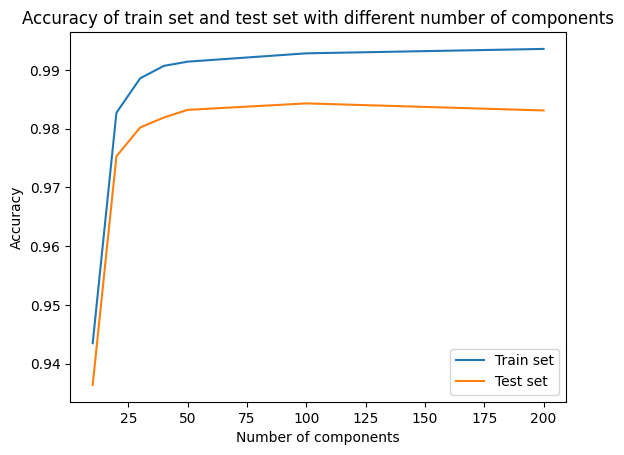

In [2]:
# Plot the learning curves for different PCA components using SVM classifier
List_accuracy_train, List_accuracy_test = Lib.SVC_PCA([10, 20, 30, 40, 50, 100, 200])

--- ---
**Decison Tree Classifier** with different values of the maximum depth:

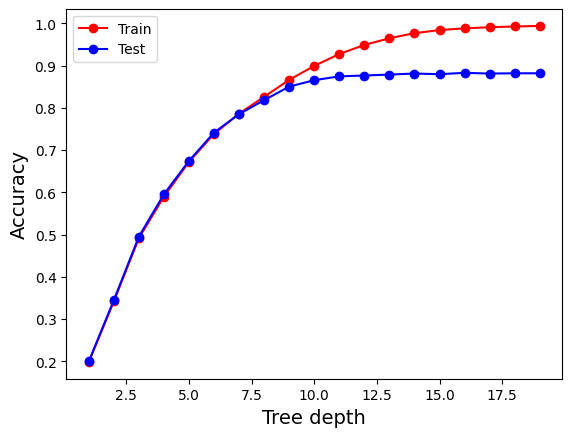

In [ ]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 20)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train_flat, Y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_flat)
    train_acc = accuracy_score(Y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test_flat)
    test_acc = accuracy_score(Y_test, test_yhat)
    test_scores.append(test_acc)
   
# plot the depth vs accuracy
plt.plot(values, train_scores, '-o', label='Train', color='red')
plt.plot(values, test_scores, '-o', label='Test', color='blue')
plt.xlabel('Tree depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

We can see that with high values of max_depth, the model is over-trained: there is overfitting. The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets. However, after a certain point, the test set accuracy starts to decrease while the train set accuracy continues to increase. This is a sign of overfitting. Thus, we can say that the best value for max_depth is 10. Indeed, we have 10 digits in the dataset.

---
**SVM** with different values of the regularization parameter kernel:

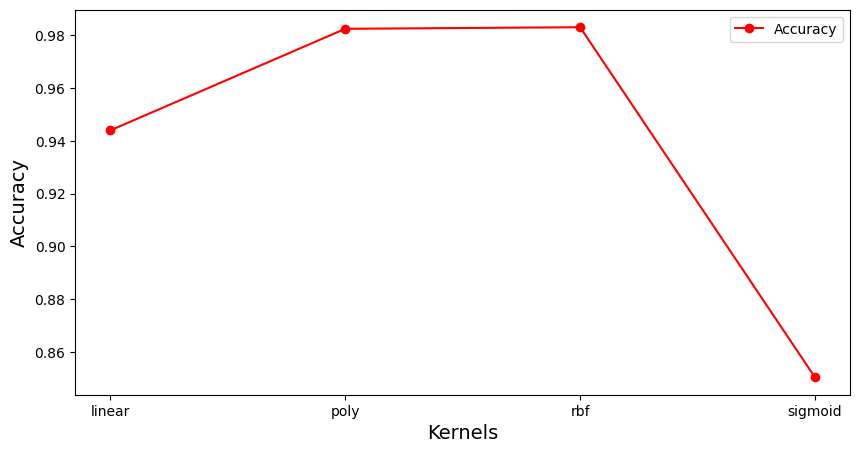

In [3]:
# The function is defined in the file Lib.py
K = ['linear', 'poly', 'rbf', 'sigmoid']

Accuracy_list = Lib.SVC_kernels(K)

# Plot the accuracy_score for different kernels
plt.figure(figsize=(10, 5))
plt.plot(K, Accuracy_list, '-o', label='Accuracy', color='red')
plt.xlabel('Kernels', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

There are differences when changing the kernel for SVM. According to the above plot, the poly and rbf kernels are the best but are slower than the linear kernel. The linear kernel is the fastest but is not the best. The sigmoid kernel is the worst. It can be explained by the fact that the sigmoid kernel is not adapted to this problem. The sigmoid kernel is adapted to binary classification problems. In this case, we have a multi-class classification problem.
Let's try to play with the regularization parameter C. We will use the linear kernel.

To make the problem easier, we will use the PCA with 2 components and only use 2 classes: 0 and 1.

In [2]:
# The function is defined in the file Lib.py
# By dedault, we use the linear kernel and C = [0.0001, 1, 100000]

Accuracy_list = Lib.SVC_C([0.0001, 1, 100, 100000])

Accuracy with linear kernel and C = 0.0001:  0.9952718676122931
Accuracy with linear kernel and C = 1:  0.9962174940898345
Accuracy with linear kernel and C = 100:  0.9962174940898345


C is a regularization parameter that controls the trade off between smooth decision boundary and classifying the training points correctly. A large C value gives you low bias and high variance, while a small C value gives you high bias and low variance. We can see that the best value for C is 1. Indeed, we have the best accuracy for C=1.

### 3.4. Does the PCA influence the performance of the classification (according to the intensity of the reduction)?

Let's try Tree Classifier with different values of PCA components:

## 4. Fourth part: deep learning

Same as in 3.1.: we want to perform a supervised image classification task.
For a model based on neural networks, the development platform will be TENSORFLOW (with KERAS included).

**MultiLayer Perceptron**

Your first deep neural network is a Multy Layer Perceptron (MLP), i.e. a feedforward network only composed of fully connected layers. For your first attempt, use only one hidden layer.

### 4.1. What is the size of the input tensor? What is the size of the output layer?

The size of the input tensor is 784. The size of the output layer is 10.

In [27]:
# Size of the input tensor
import keras
from keras import layers

input_tensor = keras.layers.Input(shape=(784,))

# Size of the output layer

output_layer = keras.layers.Dense(10, activation='softmax')(input_tensor)

# Size of the input tensor and output layer

print("Size of the input tensor: {}".format(input_tensor.shape))
print("Size of the output layer: {}".format(output_layer.shape))

Size of the input tensor: (None, 784)
Size of the output layer: (None, 10)


2023-01-29 16:07:39.706122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 16:07:39.706665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 16:07:39.706762: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-29 16:07:39.706853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-29 16:07:39.706965: W tensorflow/c

### 4.2. How many epochs do you use? What does it mean? What is the batch_size? What 1 points does it means?

An epoch is an iteration over the entire training data. We use 10 epochs. The batch_size is the number of samples per gradient update. We use a batch_size of 128.
In this case, the batch_size means that we will update the weights after 128 samples. To resume the parameters are:

    - batch size: the number of training examples used in one forward/backward pass of the neural network model.
    - number of epochs: the number of times the training algorithm iterates over the entire training set.

In [3]:
# Define epochs and batch size

epochs = 10
batch_size = 128

### 4.3. Why do we define a validation set (for example: validation_split=0.2)?

We define a validation set to check that the model is not over-trained. Indeed, if the model is over-trained, it will be able to predict the training data but not the test data. This means that the model is not generalizable.

### 4.3. Pick the most important parameters you have to set with the compile and the fit method. Briefly explain why they are important parameters, i.e. they influence the training process.

The most important parameters we have to set with the compile method are the optimizer and the loss. The optimizer is the algorithm used to minimize the loss. The loss is the function that is minimized by the optimizer. The most important parameters we have to set with the fit method are the epochs and the batch_size. The epochs is the number of iterations over the entire training data. The batch_size is the number of samples per gradient update.

In [14]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the data
(X_train, Y_train), (X_test, Y_test) = Lib.Loading_MNIST().get_all_data_raw()

# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Hot encode the labels
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Split the train set into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

The code above setup the data for the MLP. We reshape the data to have a shape of (60000, 784). We also normalize the data to have values between 0 and 1. We can now build the neural network that use only one hidden layer.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
#  Let's build the neural network that only use one hidden layer

# Create the model
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='adam')
model.summary()

# Train the model
history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs, verbose=0, validation_data=(X_val, Y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Let's plot the accuracy and the loss of the model. And also some predictions.

Test loss: 0.08449549973011017
Test accuracy: 0.9747999906539917
313/313 [==============================] - 0s 1ms/step


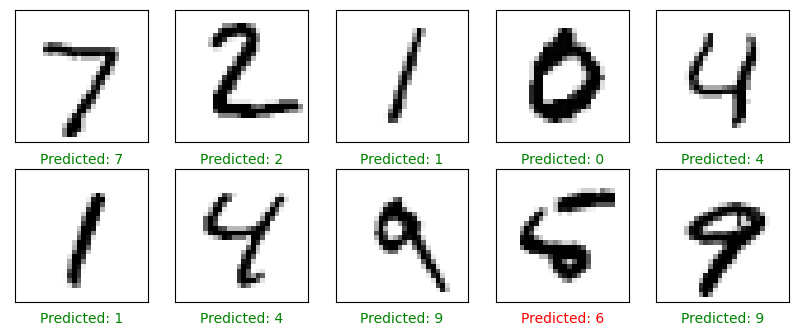

In [7]:
# Evaluate the model

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot images from the predictions
predictions = model.predict(X_test)

# Plot the first 10 images from the test set and their predicted labels and true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    if np.argmax(predictions[i]) == np.argmax(Y_test[i]):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Predicted: {}".format(np.argmax(predictions[i])), color=color)
    
plt.show()

We will come back later on the 5 identify as a 6. 

### 4.5. Comment the training results

We can plot the confusion matrix of the model. It is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class. The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

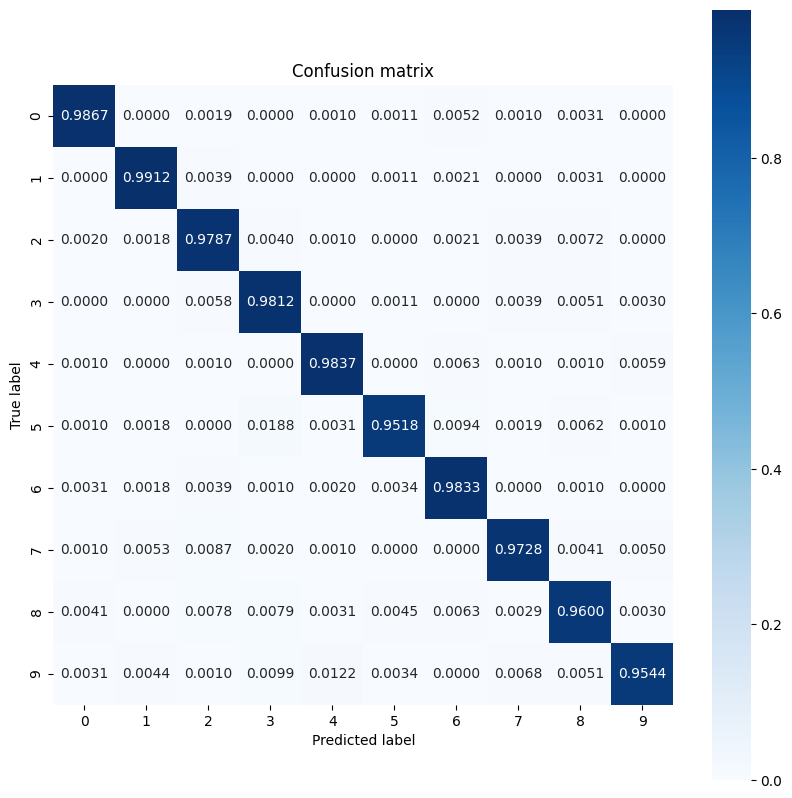

In [8]:
import numpy as np
import sklearn.metrics as sk_metrics
import seaborn as sns

def show_confusion_matrix(test_labels, test_classes):
  # Compute confusion matrix and normalize
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(test_labels, test_classes)
  confusion_normalized = confusion / confusion.sum(axis=1)
  axis_labels = range(10)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1))

### 4.6. Is there any overfitting?

There is very slight overfitting when epoch increases. The accuracy of the training set is higher than the accuracy of the testing set. However, the difference is very small. the best epoch value seems to be 2.

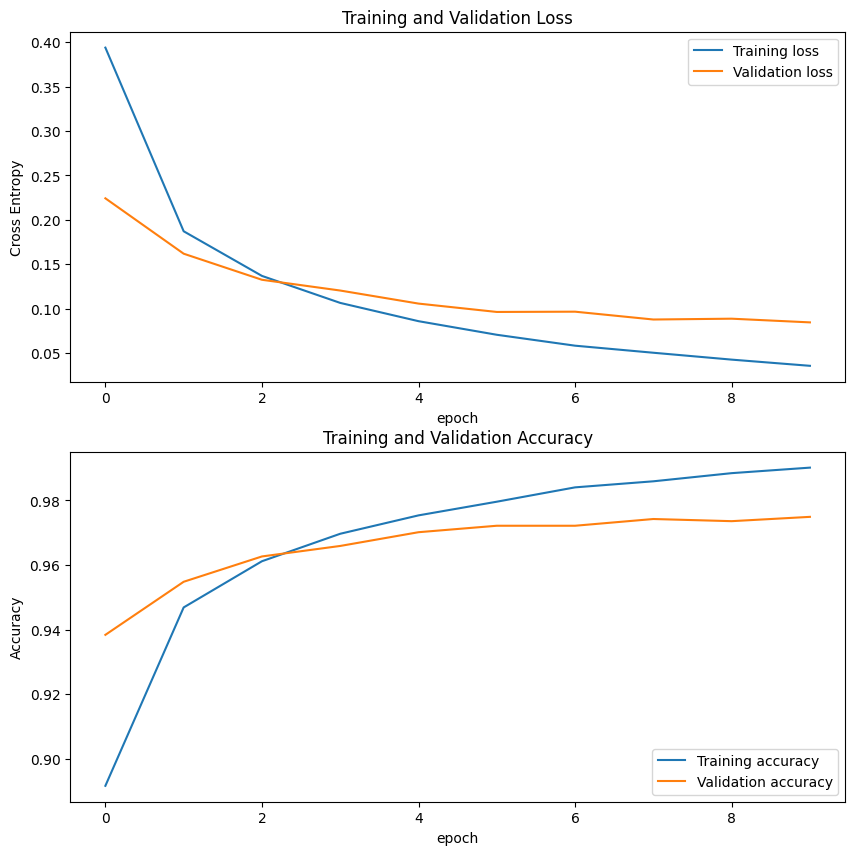

In [9]:
#Plot learning curves

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.show()

There are several ways to make the model overfit. Here are some of them:

- Increase the number of parameters 
- Increase the number of layers, resulting in a more complex model
- Increase the number of epochs
- Increase the batch size 
- Reduce the dataset size: for instance, if we take only 10 pictures, the model will be overfitted because it will be able to memorize the dataset.

In the following, we will make the model overfit by increasing the number of epochs and reducing the dataset size to 10 pictures (by default). It is possible to change it by passing the parameter **dataset_size** to the function **MLP_overfit_few_samples** from the **Overfit_MLP.py** file.

Test loss: 4.309699058532715
Test accuracy: 0.2565000057220459


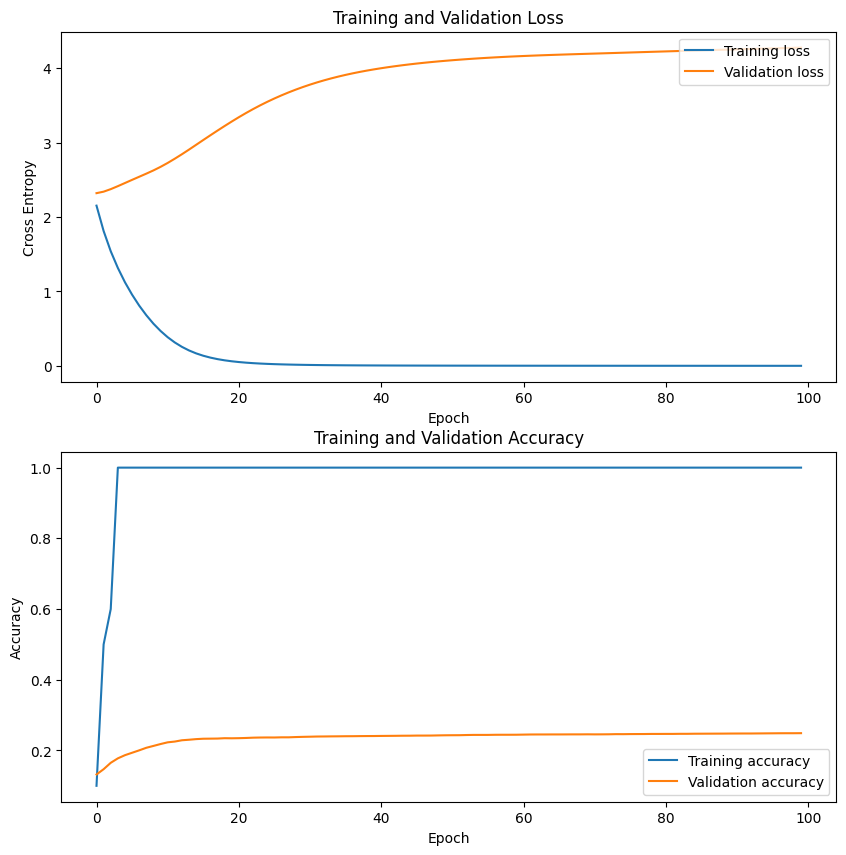

In [2]:
# Overfit a few samples
from TD_src.Overfit_MPL import *

MLP_overfit_few_samples()

The overfitting is clearly visible. The accuracy of the model is 100% on the training data but only 20% on the test data. This means that the model is not generalizable. It is not able to predict the test data. It just memorized the training data by heart.

### 4.7. According to this first performance, change the architecture of the MLP (change parameters, add/remove layers...) as well as hyper-parameters, explain why, what are the influence on the results...?

Let's now build a MLP neural network with more hidden layers to see if we can improve the accuracy. 
--- ---

Test loss: 0.0739038959145546
Test accuracy: 0.9803000092506409
313/313 [==============================] - 1s 2ms/step


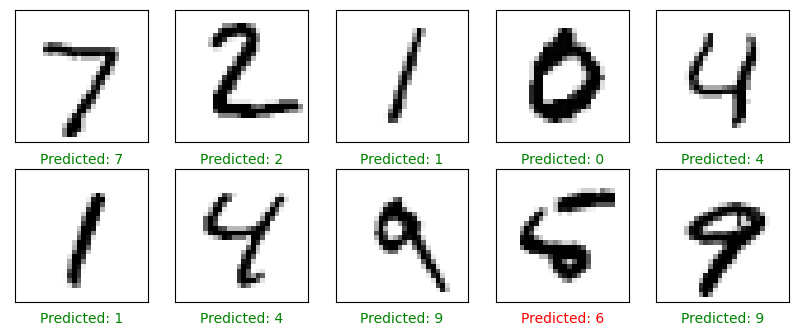

In [32]:
from keras.layers import Dropout
# Let's build the neural network that use two hidden layers

# Create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_val, Y_val))


# Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot images from the predictions
predictions = model.predict(X_test)

# Plot the first 10 images from the test set and their predicted labels and true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    if np.argmax(predictions[i]) == np.argmax(Y_test[i]):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Predicted: {}".format(np.argmax(predictions[i])), color=color)

We are really lucky because we have a misclassified digit. The prediction is 6 and the real value is 5. We can see that the original image is a 5, but does not look like a 5. It is a 5 with a little bit of noise. This is why the model is not able to predict the right value. But it is still a good result :

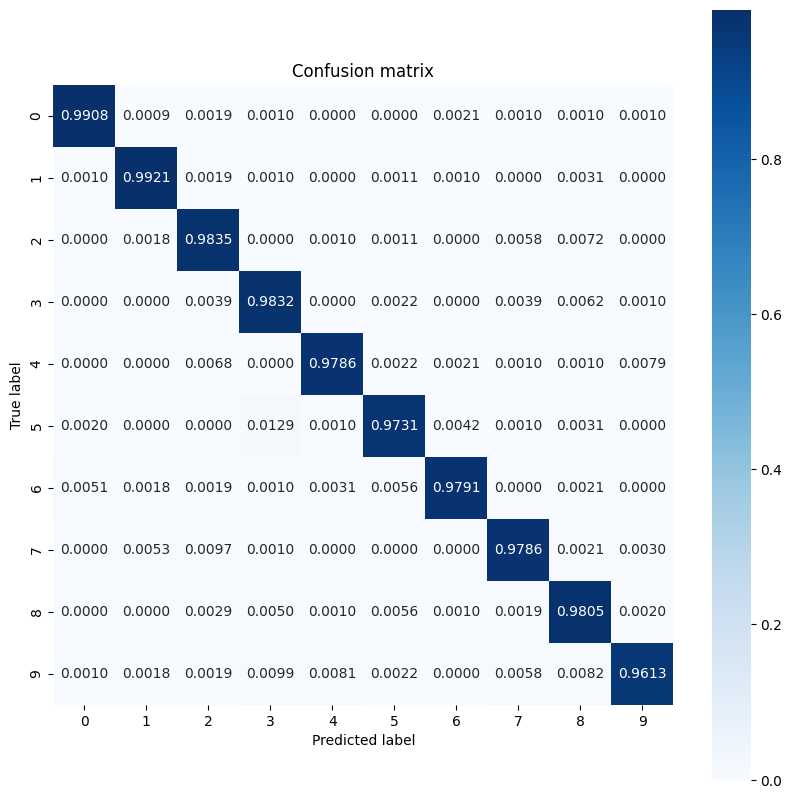

In [33]:
import numpy as np
import sklearn.metrics as sk_metrics
import seaborn as sns

def show_confusion_matrix(test_labels, test_classes):
  # Compute confusion matrix and normalize
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(test_labels, test_classes)
  confusion_normalized = confusion / confusion.sum(axis=1)
  axis_labels = range(10)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1))

In the case of a multilayer perceptron, the accuracy of the model rises to over 98%. This neural network uses 4 layers with 2 hidden layers:
- 1 input layer which takes the 784 pixels of the picture as argument
- 2 hidden layers of 512 perceptrons each with 'relu' as output fonction
- 1 output layer with 10 outputs, each one represents the probability of being the digit corresponding to the output

It has a slightly better accuracy than the previous model. It is a generalizable model. It is not overfitted. It is able to predict the test data.

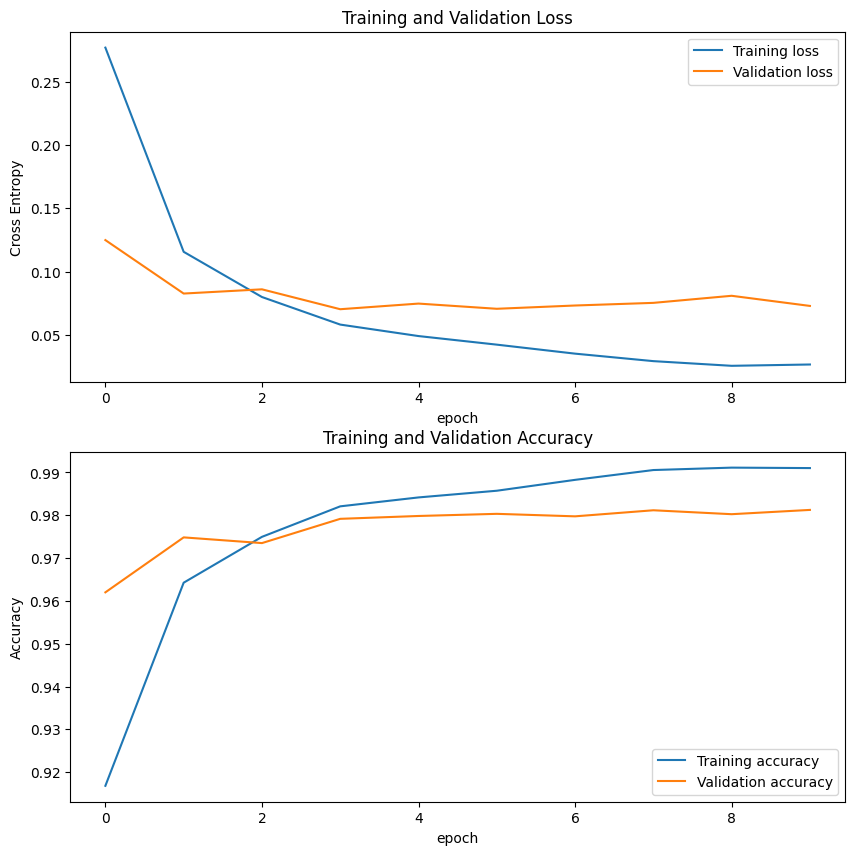

In [34]:
# Plot learning curves

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.show()

--- ---
**Convolutional Neural Network (CNN)**

### 4.6 : What is the size of the input tensor? Why it is not the same as for your previous MLP model?

The CNN model takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. Color_channels refers to (R,G,B). In this case, the size of the input tensor is **(28, 28, 1)** and we are using grayscale images. It is not the same as for the MLP model because the MLP model takes a vector as input. The CNN model takes a matrix as input.
Let's build the CNN model. We need to reload the data because the MLP model requires a vector as input and the CNN model requires a matrix as input.

In [33]:
# Let's build the CNN model

# Import the necessary modules
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.models import Sequential

# Reload the data
(X_train, Y_train), (X_test, Y_test) = Lib.Loading_MNIST().get_all_data_raw()

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert the data to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data
X_train /= 255
X_val /= 255
X_test /= 255

# Convert the labels to categorical
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val, 10)
Y_test = to_categorical(Y_test, 10)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_val, Y_val))

# Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)

### 4.7 : Is there any overfitting? Why? If yes, what could be the causes? How to fix this issue? If you do not observe overfitting, how can you make your model overfit? Try and demonstrate the overfitting

Test loss: 0.039308834820985794
Test accuracy: 0.9869999885559082
313/313 [==============================] - 1s 2ms/step


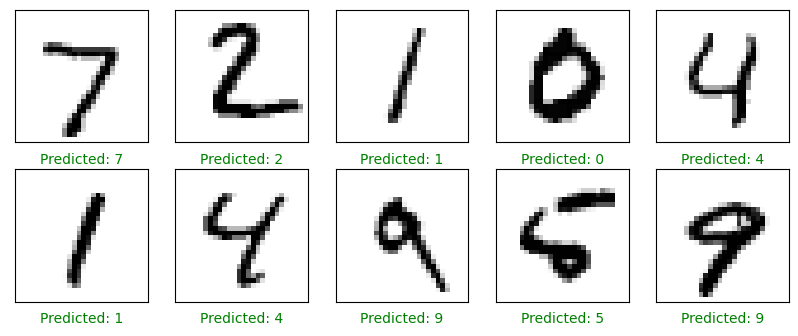

In [34]:
# Print the test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot images from the predictions
predictions = model.predict(X_test)

# Plot the first 10 images from the test set and their predicted labels and true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    if np.argmax(predictions[i]) == np.argmax(Y_test[i]):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Predicted: {}".format(np.argmax(predictions[i])), color=color)

The accuracy and the loss of the model are plotted below. We can see that there is no overfitting. The accuracy and the loss of the training set and the test set are very close. This means that the model is not over-trained. The model is able to predict the test data as well as the training data. This is a good result.

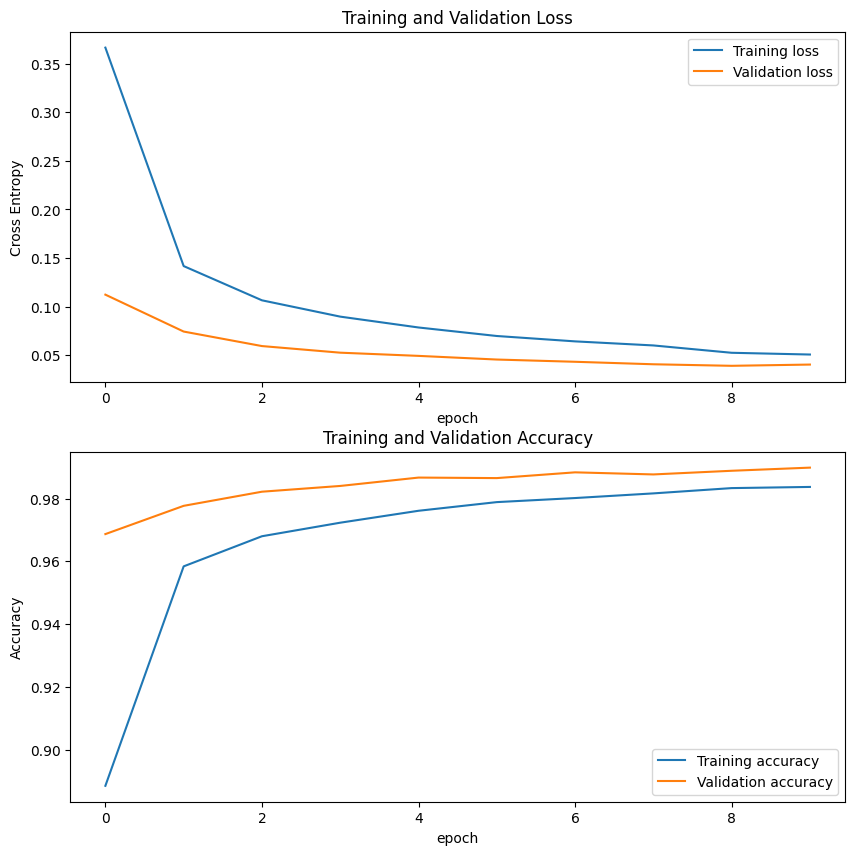

In [35]:
# Plot learning curves

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.show()

There are several ways to make the model overfit. Here are some of them:

- Increase the number of parameters 
- Increase the number of layers, resulting in a more complex model
- Increase the number of epochs
- Increase the batch size
- Reduce the dataset size: for instance, if we take only 10 pictures, the model will be overfitted because it will be able to memorize the dataset.

In the following, we will make the model overfit by increasing the number of epochs and reducing the dataset size to 10 pictures (by default). It is possible to change it by passing the parameter **dataset_size** to the function **Overfit_few_samples()**.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

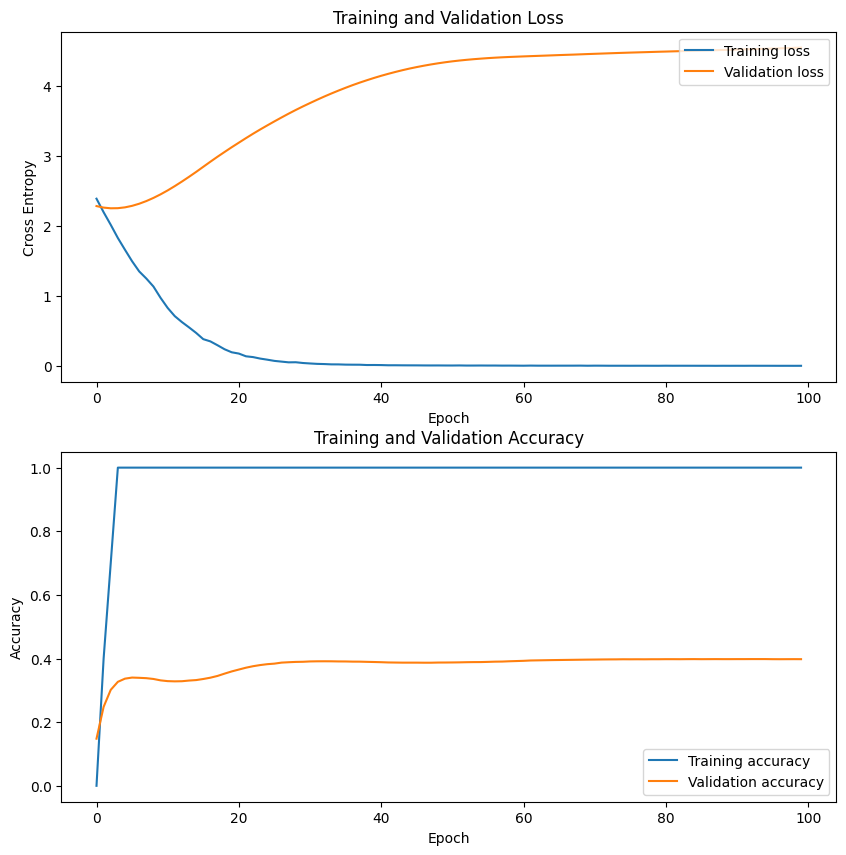

In [12]:
# Overfit a few samples
from TD_src.Overfit_CNN import *

Overfit_few_samples()

The offerfitting is obvious. Since we are using only 10 pictures, the model is able to memorize the dataset very quickly, resulting in a very high accuracy (100%) on the training set. But the accuracy on the test set is very low (35%). This is a clear sign of overfitting.
--- ---

Memory usage comparison between MLP and CNN:

Here are the parameters used for the comparaison:

- Same training and testing set
- Same number of epochs (1) and batch_size (128)
- Dropout = 0.2
- Same optimizer (adam) and loss (sparse_categorical_crossentropy)
- Two hidden layers for the MLP and two convolutional layers for the CNN

| Model | Peak memory usage (in MB) | Execution time (in seconds) |
| :--- | :--- | :--- |
| MLP | 644.24 | 9.9 |
| CNN | 679.83 | 110.3 |

According to our result, MLP is more efficient than CNN for this dataset. It is faster and uses less memory with great result. This is not always the case. It depends on the dataset and the model. For instance, CNN is more efficient for image recognition. The bigeest factor here is MNIST dataset. It is a small dataset and the images are not very complex. This is why MLP is more efficient than CNN for this dataset. Also, all images from MNIST dataset are centered and have the same size. It helps the MLP model to perform better than the CNN model.

We used the ```Lib.py``` combined with ```mprof run Lib.py``` to get the memory usage. We used the ```time``` library to get the execution time. The memory usage is the same for both models. However, the execution time is longer for the CNN. Plus, we have to take into account that most of the memory used is due to loading the dataset. Here is the memory evolution during loading the dataset:

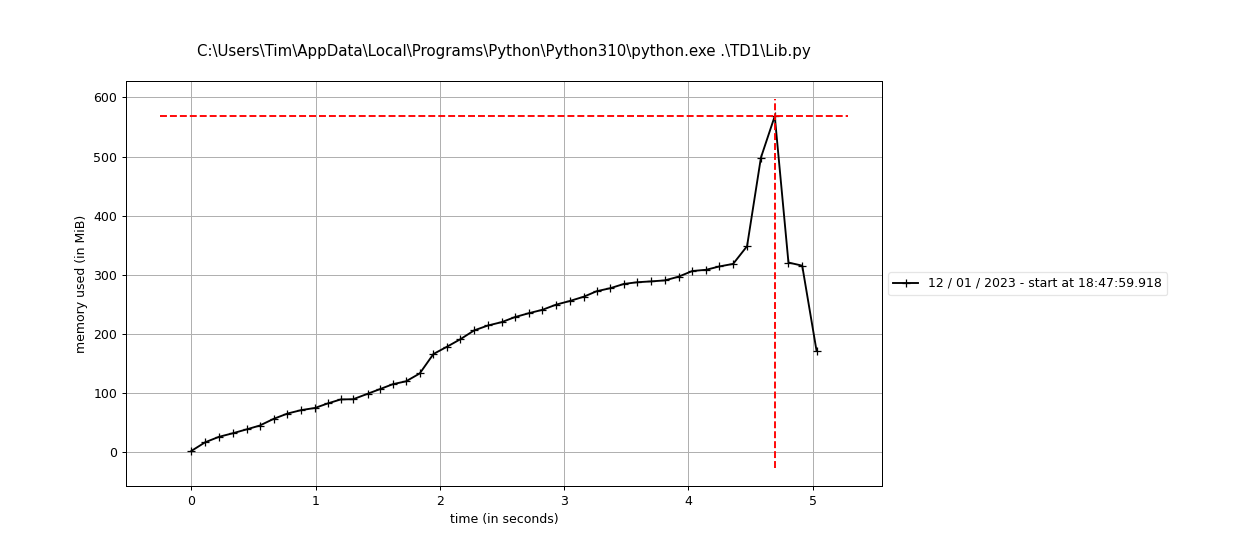

In [7]:
from IPython.display import Image
from IPython.display import display

display(Image(filename='img/loading_dataset.png'))

As we can see, loading the dataset leads to a memory usage of 568.355 MiB peak. 
Now, let's see the memory evolution during the training of both models:

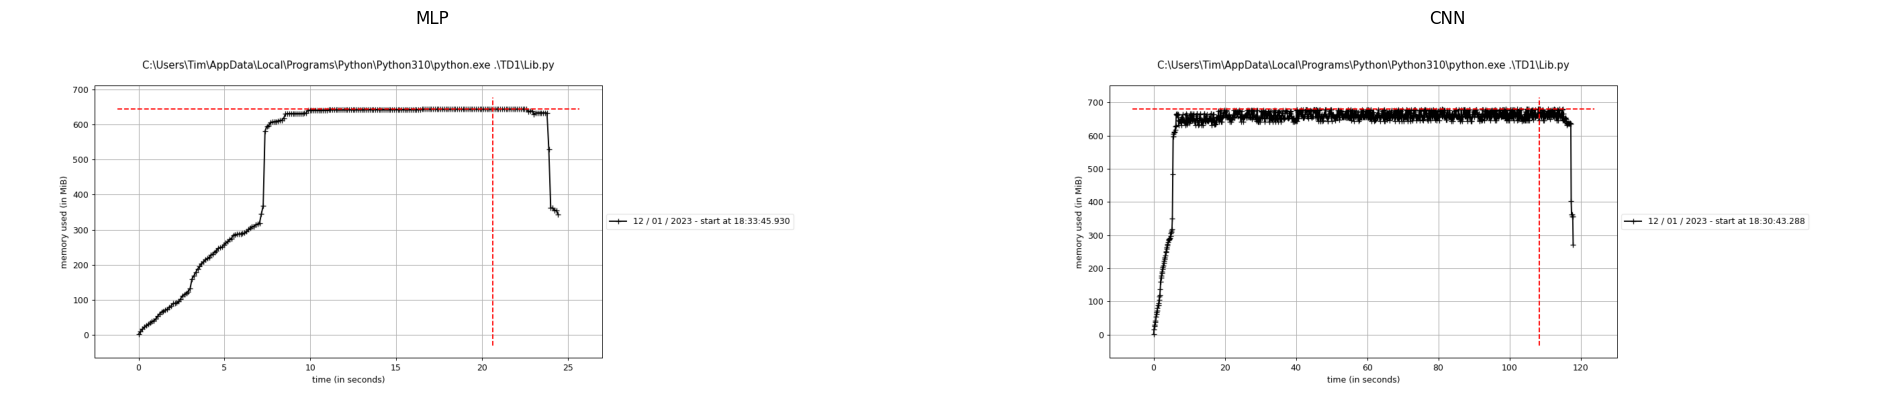

In [23]:
# CNN vs MLP memory and execution time

# Display the two images on the same plot
plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('MLP')
plt.imshow(plt.imread('img/MLP_10_epochs.png'))
plt.subplot(1, 2, 2)
plt.imshow(plt.imread('img/CNN_10_epochs.png'))
plt.title('CNN')
plt.axis('off')
plt.show()